In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.6698 - mae: 1.9481 - val_loss: 0.6551 - val_mae: 0.6312
Epoch 2/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6821 - mae: 0.6299 - val_loss: 0.5056 - val_mae: 0.5522
Epoch 3/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5254 - mae: 0.5694 - val_loss: 0.4238 - val_mae: 0.5087
Epoch 4/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4040 - mae: 0.5018 - val_loss: 0.3724 - val_mae: 0.4759
Epoch 5/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3583 - mae: 0.4766 - val_loss: 0.3404 - val_mae: 0.4435
Epoch 6/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3139 - mae: 0.4457 - val_loss: 0.3278 - val_mae: 0.4421
Epoch 7/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3019 - mae: 0.4376 - val_loss: 0.3324 - val_mae: 0.4518
Epoch 8/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3084 - mae: 0.4407 - val_loss: 0.2990 - val_mae: 0.4164
Epoch 9/32
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2729 

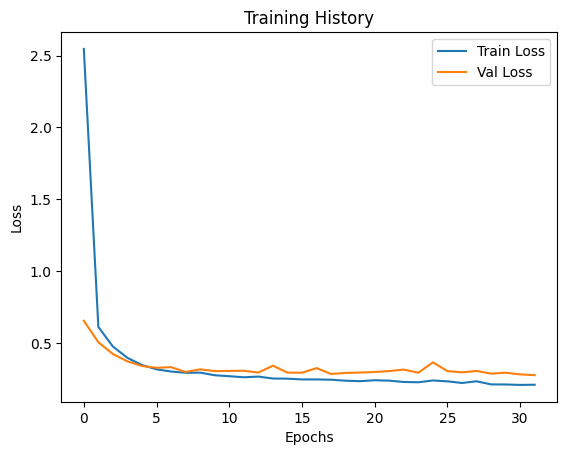

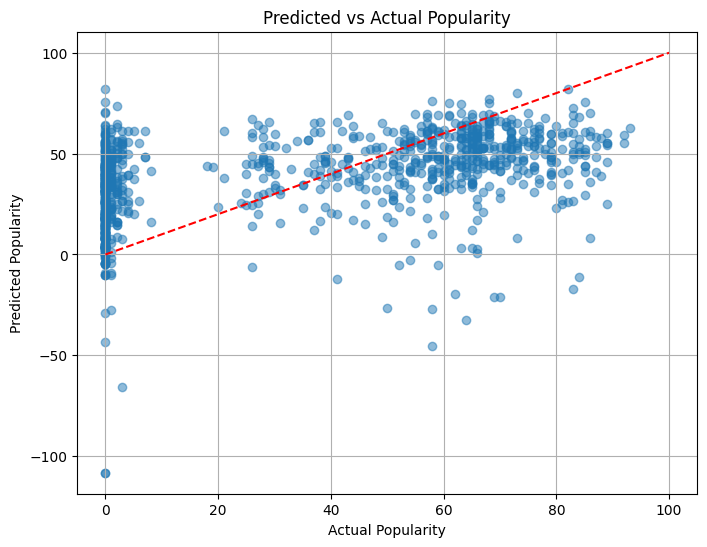

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2866 - mae: 0.4202 
Test Loss: 0.2758
Test MAE: 0.4079


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')
#genres = ["Acoustic", "Pop", "Rock", "Hip-Hop", "Jazz"]
#df['track_genre'] = df['track_genre'].str.lower()
#genres = [genre.lower() for genre in genres]
#df = df[df['track_genre'].isin(genres)]

if df.empty:
    print("Error: DataFrame is empty after filtering. Check if the specified genres exist in the dataset.")
else:
    features = ['danceability', 'energy', 'valence', 'tempo',
                'acousticness', 'instrumentalness', 'loudness',
                'speechiness', 'duration_ms']
    X = df[features]
    y = df['popularity']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    max_popularity = y.max()
    y_reflected = max_popularity - y
    y_transformed = np.log1p(y_reflected)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)


    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_split=0.2)

    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test MAE (in transformed space): {test_mae:.4f}")

    y_pred_transformed = model.predict(X_test)
    y_pred = max_popularity - np.expm1(y_pred_transformed)
    y_actual = max_popularity - np.expm1(y_test)

    # Training Loss Plot
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training History")
    plt.show()

    # Scatter Plot of Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.5)
    plt.xlabel("Actual Popularity")
    plt.ylabel("Predicted Popularity")
    plt.title("Predicted vs Actual Popularity")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.grid(True)
    plt.show()

    from sklearn.metrics import mean_absolute_error

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")




In [ ]:
def predict_song_popularity(model, scaler, max_popularity):
    print("Enter the song's features:")

    danceability = float(input("Danceability (0 - 1): "))
    energy = float(input("Energy (0 - 1): "))
    valence = float(input("Valence (0 - 1): "))
    tempo = float(input("Tempo (BPM): "))
    acousticness = float(input("Acousticness (0 - 1): "))
    instrumentalness = float(input("Instrumentalness (0 - 1): "))
    loudness = float(input("Loudness (dB): "))
    speechiness = float(input("Speechiness (0 - 1): "))
    duration_ms = float(input("Duration (ms): "))

    input_data = pd.DataFrame({
        'danceability': [danceability],
        'energy': [energy],
        'valence': [valence],
        'tempo': [tempo],
        'acousticness': [acousticness],
        'instrumentalness': [instrumentalness],
        'loudness': [loudness],
        'speechiness': [speechiness],
        'duration_ms': [duration_ms]
    })

    input_scaled = scaler.transform(input_data)

    predicted_transformed = model.predict(input_scaled)

    predicted_popularity = max_popularity - np.expm1(predicted_transformed)

    print(f"Predicted Popularity: {predicted_popularity[0][0]:.2f}")

predict_song_popularity(model, scaler, max_popularity)



Enter the song's features:
Danceability (0 - 1): 0.621
Energy (0 - 1): 0.782
Valence (0 - 1): .55
Tempo (BPM): 128
Acousticness (0 - 1): 0.0125
Instrumentalness (0 - 1): 0.033
Loudness (dB): -5.548
Speechiness (0 - 1): 0.044
Duration (ms): 198937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Popularity: 39.59


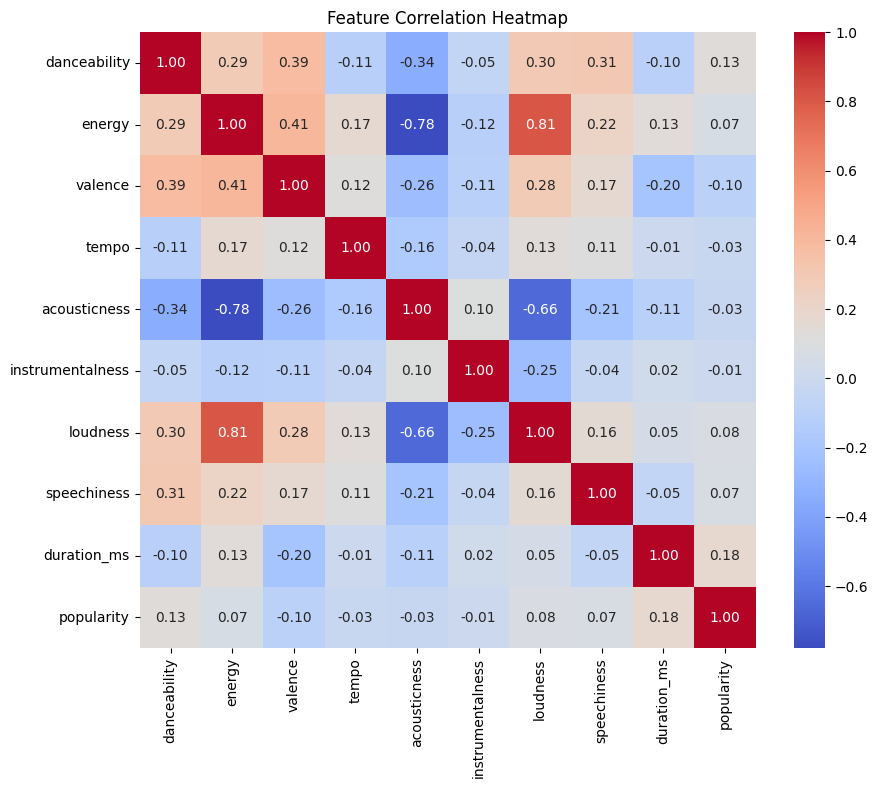

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'valence', 'tempo',
            'acousticness', 'instrumentalness', 'loudness',
            'speechiness', 'duration_ms', 'popularity']

corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title("Feature Correlation Heatmap")
plt.show()
